# This is a data science report investigating mass shooting statistics in the United States from 2014-2016

The motivation of this report is to examine which states have the most incidents of reported mass shootings and observe the trend of mass shootings.
The sources of the data come from:
- https://www.statefirearmlaws.org/table.html
- https://www.kaggle.com/gunviolencearchive/gun-violence-database
- https://www.census.gov/data/datasets/2017/demo/popest/state-total.html

I first look at the number of incidents by state, and then I examine the city statistics.
Next, I investigate the connection between the number of gun control laws and number of mass shooting incidents.

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
from plotly import tools
import plotly.graph_objs as go


%matplotlib inline
init_notebook_mode(connected=True)


In [296]:
mass_shootings2014 = pd.read_csv("mass_shootings_2014.csv")
mass_shootings2015 = pd.read_csv("mass_shootings_2015.csv")
mass_shootings2016 = pd.read_csv("mass_shootings_2016.csv")

In [297]:
mass_shootings141516 = pd.concat([mass_shootings2014,mass_shootings2015,mass_shootings2016])

## Total violence from mass shootings from 2014-2016

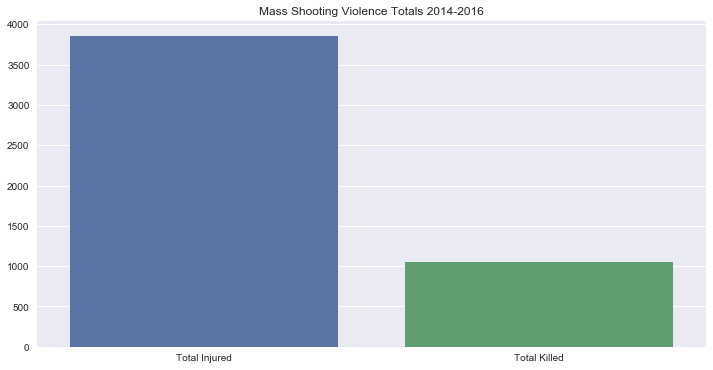

In [329]:
Totals = pd.DataFrame(data={'Total Killed':[sum(mass_shootings141516['# Killed'])],'Total Injured': [sum(mass_shootings141516['# Injured'])]})

fig = plt.figure(figsize=(12,6))
ax = sns.barplot(data=Totals)
ax.set_title("Mass Shooting Violence Totals 2014-2016")

## Lets look at the data by state

In [299]:
sorted_by_state = mass_shootings141516.sort_values(by=['State'],axis=0,ascending=True)
sorted_by_state.drop('Operations',axis=1,inplace=True)
sorted_by_state.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured
177,"June 8, 2014",Alabama,Opp,611 Hardin Street,1,4
288,"April 9, 2016",Alabama,Anniston,West 15th Street and Crawford Avenue,0,4
35,"November 16, 2015",Alabama,Cherokee (county),1400 block of County Road 664,3,1
283,"April 16, 2016",Alabama,Enterprise,Baxter Street,0,4
274,"April 19, 2016",Alabama,Blountsville,81551 Us Highway 278,1,4


# Lets look at the number of incidents by state, and put it in a new database on its own

In [300]:
num_of_inc = {}
states = list(sorted_by_state['State'].unique())
for state in states:
    count = 0
    for entry in sorted_by_state['State']:
        if entry == state:
            count += 1
    num_of_inc[state] = count

In [301]:

incident_ct = pd.DataFrame(num_of_inc.items(),columns=["State","# of incidents"])

incident_ct = incident_ct.sort_values("# of incidents",axis=0,ascending=False)
incident_ct.reset_index(drop=True,inplace=True)
incident_ct.head()

,State,# of incidents
0,California,114
1,Illinois,87
2,Florida,70
3,Texas,61
4,Georgia,53


# Lets produce a bar plot to visualize these results

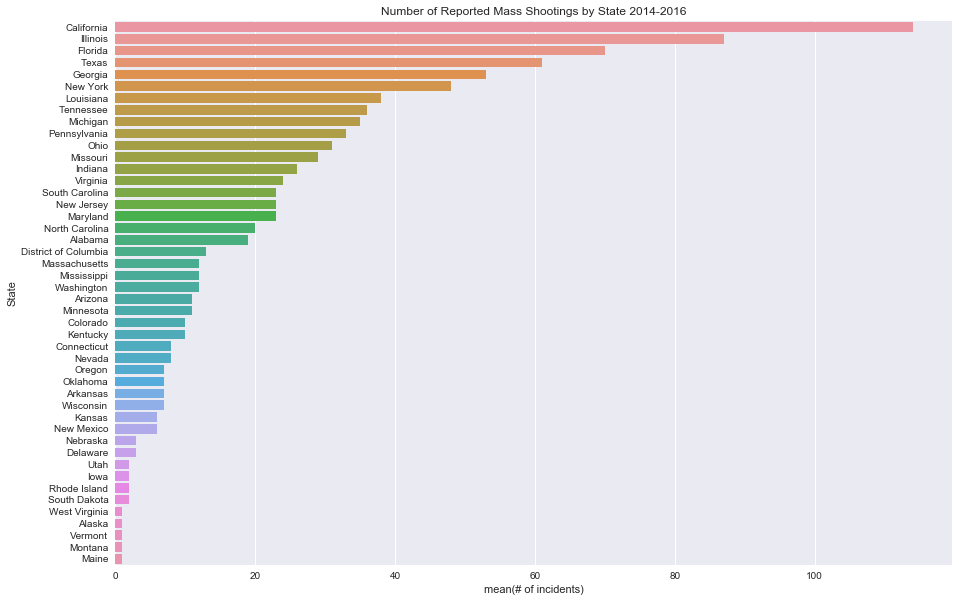

In [302]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title("Number of Reported Mass Shootings by State 2014-2016")
ax.tick_params("y",labelsize=10)
sns.barplot(x = "# of incidents",y="State",data=incident_ct)


# Lets do a US choropleth plot

In [303]:
abbrevs = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL',
           'GA','IL','IN','IA','KS','KY','LA',
           'ME','MD','MA','MI','MN','MS','MO','MT','NE',
           'NV','NJ','NM','NY','NC','OH','OK','OR','PA',
           'RI','SC','SD','TN','TX','UT','VT','VA','WA',
           'WV','WI']

##Realphabetize the incident_ct dataframe
incident_ct = incident_ct.sort_values('State',axis=0,ascending=True)
incident_ct.drop(19,axis=0,inplace=True)#Drop District of Columbia

In [304]:
data = dict(type = "choropleth",
           locations = abbrevs,
           colorscale = 'coolwarm',
           locationmode = 'USA-states',
           z = incident_ct['# of incidents'],
           colorbar = {'title':'Number of Incidents'})

layout = dict(title = "Number of Incidents of Mass Shootings in USA 2014-2016",geo={"scope":"usa"})

choropleth = go.Figure(data=[data],layout=layout)

In [305]:
iplot(choropleth)

## Lets look at the trend by city

In [306]:
by_city = mass_shootings141516.sort_values("City Or County",axis=0)
by_city.drop("Operations",axis=1,inplace=True)
by_city.reset_index('City Or County',drop=True,inplace=True)

In [307]:
cty_or_cnty = list(by_city['City Or County'].unique())

In [308]:
inc_by_city = {}

for place in cty_or_cnty:
    count = 0
    for entry in by_city["City Or County"]:
        if entry == place:
            count += 1
    inc_by_city[place] = count

In [309]:
cty_inc_count = pd.DataFrame(data=inc_by_city.items(),columns=['City','# of Incidents'])
cty_inc_count.sort_values('# of Incidents',axis=0,ascending=False,inplace=True)
cty_inc_count.reset_index(drop=True,inplace=True)

## Pie Chart of the distribution of the top 20 cities where mass shooting incidents happen

In [310]:
total_inc = sum(cty_inc_count['# of Incidents'])
cty_inc_count['% of total'] = (cty_inc_count['# of Incidents']/total_inc)*100

pie_fig = go.Pie(labels=cty_inc_count['City'].head(21),
                 values=cty_inc_count['% of total'].head(20),
                 hoverinfo='label',
                 )
iplot([pie_fig],filename="Deadliest_pie")

In [333]:
cty_inc_count.head()

,City,# of Incidents,% of total
0,Chicago,57,5.943691
1,Detroit,22,2.294056
2,New Orleans,20,2.085506
3,Los Angeles,19,1.981230
4,Memphis,17,1.772680


In [311]:
gun_laws = pd.read_csv("raw_data141516.csv")

In [312]:
gun_control_data = {"State":list(gun_laws['state'][0:50]),
                    'total_laws2014':list(gun_laws['lawtotal'][0:50]),
                    'total_laws2015':list(gun_laws['lawtotal'][50:100]),
                    'total_laws2016':list(gun_laws['lawtotal'][100:150])}

## Track the total number of gun control laws by state 2014-2016

In [313]:
gun_law_totals_by_year = pd.DataFrame(gun_control_data,columns =['State','total_laws2014','total_laws2015','total_laws2016'] )

In [314]:
gun_law_totals_by_year.head()

,State,total_laws2014,total_laws2015,total_laws2016
0,Alabama,10,10,10
1,Alaska,4,4,4
2,Arizona,11,11,11
3,Arkansas,11,11,11
4,California,100,102,104


In [315]:
sorted_by_state2014 = mass_shootings2014.sort_values(by=['State'],axis=0,ascending=True)
sorted_by_state2015 = mass_shootings2015.sort_values(by=['State'],axis=0,ascending=True)
sorted_by_state2016 = mass_shootings2016.sort_values(by=['State'],axis=0,ascending=True)

sorted_df_list = [sorted_by_state2014,sorted_by_state2015,sorted_by_state2016]

num_of_inc_by_year = {}
new_dataframe_list = []
states = list(sorted_by_state2014['State'].unique())
for df in sorted_df_list:
    for state in states:
        count = 0
        for entry in df['State']:
            if entry == state:
                count += 1
        num_of_inc_by_year[state] = count
    new_dataframe_list.append(pd.DataFrame(num_of_inc_by_year.items(),columns=["State","# of incidents"]))

for df in new_dataframe_list:
    df.sort_values('State',axis=0,ascending=True,inplace=True)
    df.reset_index(drop=True,inplace=True)


In [316]:
incidents_by_year = pd.DataFrame({'State':new_dataframe_list[0]['State'],
                                  'total_inc2014':new_dataframe_list[0]['# of incidents'],
                                  'total_inc2015':new_dataframe_list[1]['# of incidents'],
                                  'total_inc2016':new_dataframe_list[2]['# of incidents']},
                                columns = ['State','total_inc2014','total_inc2015','total_inc2016'])

In [317]:
joined_data = incidents_by_year.join(gun_law_totals_by_year.set_index('State'),on='State')
joined_data.set_index('State',inplace=True,drop=False)
joined_data.drop('District of Columbia', axis=0,inplace=True)

In [318]:
joined_data.head()

,State,total_inc2014,total_inc2015,total_inc2016,total_laws2014,total_laws2015,total_laws2016
State,,,,,,,
Alabama,Alabama,2,4,13,10.0,10.0,10.0
Alaska,Alaska,1,0,0,4.0,4.0,4.0
Arizona,Arizona,1,6,4,11.0,11.0,11.0
Arkansas,Arkansas,2,2,3,11.0,11.0,11.0
California,California,45,28,41,100.0,102.0,104.0


In [319]:
scatter2014 = go.Scatter(
                x=joined_data['total_laws2014'],
                y=joined_data['total_inc2014'],
                mode='markers',
                text=joined_data['State']
                )

scatter2015 = go.Scatter(
                x=joined_data['total_laws2015'],
                y=joined_data['total_inc2015'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x2',
                yaxis='y2'
                )
scatter2016 = go.Scatter(
                x=joined_data['total_laws2016'],
                y=joined_data['total_inc2016'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x3',
                yaxis='y3'
                )

#data1 = [scatter2014,scatter2015,scatter2016]


#fig = go.Figure(data=data,layout=layout)
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('2014', '2015','2016'))
fig.append_trace(scatter2014, 1, 1)
fig.append_trace(scatter2015, 1, 2)
fig.append_trace(scatter2016, 1, 3)


fig['layout']['xaxis1'].update(title='# of Gun Laws')
fig['layout']['xaxis2'].update(title='# of Gun Laws')
fig['layout']['xaxis3'].update(title='# of Gun Laws')
fig['layout']['yaxis1'].update(title='# of Reported Incidents')

iplot(fig,filename='gun_laws_incidents')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



## Read in some population estimates from US Census Bureau

In [320]:
yearly_pop = pd.read_csv('nst-est2017-alldata.csv')

In [327]:
yearly_pop.head()

,STATE,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,BIRTHS2014,BIRTHS2015,BIRTHS2016,...,RNATURALINC2016,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,Alabama,4840037,4850858,4860545,12377,10821,9687,58908,59638,59095,...,1.445311,0.848185,0.995780,0.963404,-0.153915,-0.317205,-0.404473,0.694271,0.678575,0.558931
1,Alaska,736759,737979,741522,-1,1220,3543,11449,11335,11220,...,9.139568,2.650797,3.123267,2.544101,-13.016459,-11.115195,-6.923956,-10.365662,-7.991928,-4.379855
2,Arizona,6706435,6802262,6908642,90311,95827,106380,86124,86766,85201,...,4.096885,2.111606,2.426881,2.410490,5.988339,6.692725,9.005533,8.099945,9.119606,11.416023
3,Arkansas,2964800,2975626,2988231,8020,10826,12605,38230,38784,38497,...,2.647280,1.027766,1.196547,1.200230,-1.111865,-0.052185,0.388675,-0.084099,1.144362,1.588905
4,California,38701278,39032444,39296476,353895,331166,264032,498911,500352,488905,...,5.562850,3.849204,4.321831,4.298566,-1.202617,-2.080410,-3.118210,2.646587,2.241421,1.180356


In [322]:
scatter_pop2014 = go.Scatter(
                x=yearly_pop['POPESTIMATE2014'],
                y=joined_data['total_inc2014'],
                mode='markers',
                text=joined_data['State']
                )

scatter_pop2015 = go.Scatter(
                x=yearly_pop['POPESTIMATE2015'],
                y=joined_data['total_inc2015'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x2',
                yaxis='y2'
                )
scatter_pop2016 = go.Scatter(
                x=yearly_pop['POPESTIMATE2016'],
                y=joined_data['total_inc2016'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x3',
                yaxis='y3'
                )


fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('2014', '2015','2016'))
fig.append_trace(scatter_pop2014, 1, 1)
fig.append_trace(scatter_pop2015, 1, 2)
fig.append_trace(scatter_pop2016, 1, 3)


fig['layout']['xaxis1'].update(title='Population Estimate')
fig['layout']['xaxis2'].update(title='Population Estimate')
fig['layout']['xaxis3'].update(title='Population Estimate')
fig['layout']['yaxis1'].update(title='# of Reported Incidents')


iplot(fig,filename='Pop_inc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



In [325]:
scatter_popch2014 = go.Scatter(
                x=yearly_pop['NPOPCHG_2014'],
                y=joined_data['total_inc2014'],
                mode='markers',
                text=joined_data['State']
                )

scatter_popch2015 = go.Scatter(
                x=yearly_pop['NATURALINC2015'],
                y=joined_data['total_inc2015'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x2',
                yaxis='y2'
                )
scatter_popch2016 = go.Scatter(
                x=yearly_pop['NATURALINC2016'],
                y=joined_data['total_inc2016'],
                mode='markers',
                text=joined_data['State'],
                xaxis='x3',
                yaxis='y3'
                )


fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('2014', '2015','2016'))
fig.append_trace(scatter_popch2014, 1, 1)
fig.append_trace(scatter_popch2015, 1, 2)
fig.append_trace(scatter_popch2016, 1, 3)


fig['layout']['xaxis1'].update(title='Net Population Change')
fig['layout']['xaxis2'].update(title='Net Population Change')
fig['layout']['xaxis3'].update(title='Net Population Change')
fig['layout']['yaxis1'].update(title='# of Reported Incidents')


iplot(fig,filename='Pop_ch_inc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



# What did I learn?

## Total violence counts:

- Killed: >1000
- Injured: >3500

## Incidents by state:

Out of all available data, the top 5 states with highest number of incidents of mass shooting:

- California (114)
- Illinois (87)
- Florida (70)
- Texas (61)
- Georgia (53)


## Incidents by city:

- Chicago accounts for 5.94% (57/959) of total incidents of mass shooting from 2014-2016. 18.3% of top 20 cities.

This is more than double the next highest city: Detroit (2.29%)

## Gun Laws:

Two states that in 2014 had the same # of gun related laws (California, Massachusetts) had drastically different numbers of reported incidents of mass shootings.

### 2014:
- California (100 gun related laws, 45 incidents)
- Massachusetts (100 gun related laws, 4 incidents)

#### Context:

The total number of gun laws is a sum total of 1's in a csv underneath the name of a law. A 0 in that column meant that law does not exist in that state as of 2014. California and Massachusetts happen to have the same sum total of laws, but not necessarily the same laws one-for-one. There could be more tighter regulation in one area of firearms in one state than the other.

Many states shared the same number of gun laws, but the difference in mass shooting incident count wasnt as drastically different as between California and Massachusetts. Further factors should be examined such as population estimates.

Chicago was the city with the highest incident count in the USA over 2014-2016. Illinois ranked in the top 7 in states with the most gun laws in place.

There is no clear correlation between the number of gun laws a state has v.s. the number of mass shooting incidents, especially in 2015. Perhaps it would make more sense to examine which states have or do not have certain laws v.s. incident count.

## Population:

### Population estimates:

Across all years, there seems to be a strong correlation with population estimates and mass shooting incidents. Correlation does not equal causation, and it may be a stretch to say larger populations CAUSE mass shootings, but perhaps its more probable to happen in large population centers.

### Population Changes:

Its not quite as clear for states with smaller net changes (0-50000) in population from the previous year. Factors vary from state to state. The fringe cases include the top 5 states where mass shootings happen. Again, net change in population does not cause mass shootings, but states where more and more people are moving to (California, Texas, Florida e.g.) are states where some of the most incidents of mass shooting occur.

#### Illinois
An interesting observation is Illinois which in going from 2013 to 2014 had a large negative net population change (-7965), but still had 25 incidents of mass shootings. This is in the top 2 for 2014. This detail is spurious because in going from 2014 to 2015, the population change of Illinois increased and reported the same number of incidents, and going from 2015-2016, the population again increased and the number of incidents increased to 37